In [142]:
import pandas as pd
from pandapower.timeseries.run_time_series import run_timeseries
import matplotlib
matplotlib.rcParams['timezone'] = 'Europe/Berlin'

import data_process_base
import importlib
importlib.reload(data_process_base)

try:
    import seaborn
    colors = seaborn.color_palette()
except:
    colors = ["b", "g", "r", "c", "y"]

In [143]:
# create random time series from import data
da = data_process_base.DataAction()
nc = data_process_base.net_calc()

keep_cols = ['DE_KN_residential1_grid_import',
             'DE_KN_residential2_grid_import',
             'utc_timestamp']
da.imp_procc("house_data.csv", keep_cols)

Number of data frame segments =  90
dfList created successfully.


In [144]:
def end_results(sgen_val, iter):
    """
    Final boss

    """
    # create df to store output
    col_names = ['line_1', 'line_2', 'line_3', 'line_4', 'line_5', 'line_6', 'line_7', 'line_8']
    end_vals = pd.DataFrame(columns=col_names)
    end_times = pd.DataFrame(dtype='str', columns=col_names)

    for i in range(0, iter):
        # iterative scramble
        night_merge = da.power_merge()

        # assign generator value at random times
        # night_mw = da.sgen_comm(ts=night_merge, wind_length=60, sgen_val=sgen_val, parties=4)
        night_mw = da.sgen_rand(ts=night_merge, sgen_val=sgen_val)

        nc.four_loads_branched_make(night_mw)
        nc.four_loads_branched_out("res_line", "loading_percent")
        nc.four_loads_branched_run()
        nc.four_loads_branched_read_loadpct()

        nc.end_vals_step(nc.ll, end_vals)
        nc.end_times_step(nc.ll, end_times)

    return end_vals, end_times


iter = 1
sgen_val = 0.01 # typical val: 0.010 MW = 10kW
end_vals, end_times = end_results(sgen_val, iter)

100%|██████████| 601/601 [00:01<00:00, 355.68it/s]


In [145]:
end_vals

,line_1,line_2,line_3,line_4,line_5,line_6,line_7,line_8
0,27.742583,20.294655,14.623596,8.509787,8.761251,8.490346,9.453027,8.510065
1,31.457621,22.236527,16.341825,9.476525,9.575075,8.500629,14.063746,9.476774
2,37.897511,32.120399,19.073844,8.490483,8.784049,23.616420,15.813297,8.490761
3,39.446975,33.029453,25.993134,8.171922,10.261077,8.494475,21.978493,8.172211
4,28.165453,19.873330,14.101400,8.495721,10.846979,8.485458,8.164863,8.495999
5,38.117868,30.194038,23.765917,17.567976,17.363549,8.510898,8.055776,17.568110
6,35.729777,29.098470,24.948751,8.488654,8.489652,8.500264,20.896674,8.488932
7,37.126076,20.211115,15.751680,8.502439,25.217013,8.523351,8.287116,8.502717
8,26.994831,20.392049,15.258790,8.498082,8.137544,8.501128,8.288931,8.498360
9,27.280756,20.329649,14.226900,8.500719,8.759446,8.503171,8.486384,8.500996


In [146]:
end_times

,line_1,line_2,line_3,line_4,line_5,line_6,line_7,line_8
0,19:58:00,03:55:00,03:55:00,21:19:00,22:10:00,23:55:00,20:43:00,21:19:00
1,20:52:00,21:22:00,21:22:00,19:11:00,20:52:00,01:16:00,19:55:00,19:11:00
2,19:42:00,19:42:00,19:01:00,03:51:00,19:01:00,19:48:00,19:02:00,03:51:00
3,19:04:00,19:04:00,19:04:00,19:09:00,21:54:00,22:45:00,19:04:00,19:09:00
4,19:43:00,21:48:00,21:48:00,01:27:00,19:43:00,18:25:00,21:48:00,01:27:00
5,20:28:00,20:28:00,20:28:00,20:28:00,21:10:00,21:09:00,03:59:00,20:28:00
6,19:27:00,19:27:00,19:24:00,22:27:00,20:37:00,21:54:00,19:24:00,22:27:00
7,19:12:00,21:10:00,03:01:00,03:25:00,19:45:00,19:39:00,18:06:00,03:25:00
8,21:35:00,21:36:00,18:01:00,00:20:00,21:50:00,01:15:00,21:35:00,00:20:00
9,03:58:00,18:06:00,18:05:00,19:31:00,19:52:00,22:22:00,00:17:00,19:31:00


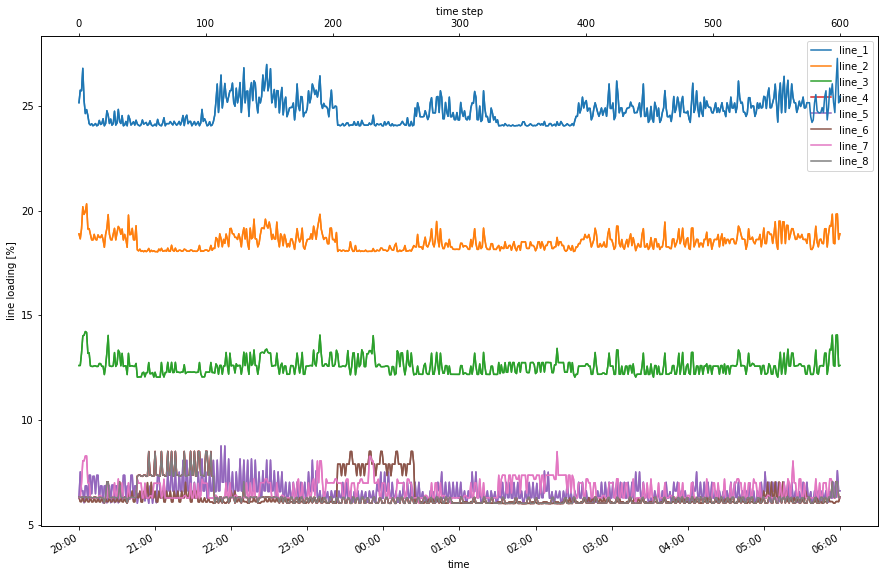

In [147]:
nc.four_loads_branched_plot_linepct()

100%|██████████| 2/2 [00:00<00:00, 46.97it/s]


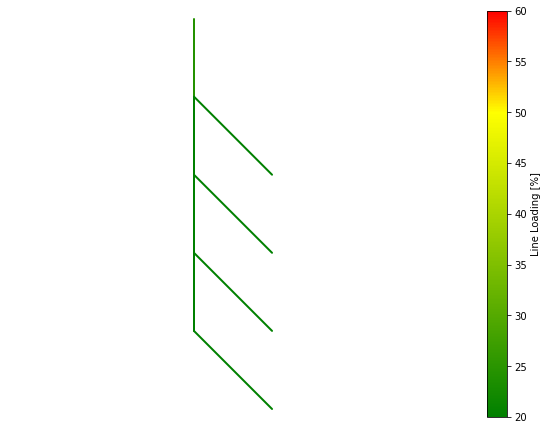

In [148]:
nc.load_graph(nc.net, time_step=170)